# Tracer simulation results

* A notebook summarized the offline tracer simulations in ORCA2 configurations and how the results related with previous researches & forcing files.

In [1]:
import sys
sys.path.insert(0, '_libs/')

In [2]:
import glob
import scipy.io
import numpy as np
import netCDF4 as nc
import NEMO_tools as Nts
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
% matplotlib inline

In [3]:
RB=[0.25, 0.41, 0.88]    # Royal blue
AM=[0.90, 0.17, 0.31]    # Amathran

In [59]:
def plot_Ba(nav_lon, nav_lat, Ba_masked, lev, cmap, ax):
    proj=Basemap(projection='npstere', resolution='c', boundinglat=55, lon_0=90, round=True, ax=ax)
    proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
    proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
    proj.drawcoastlines(linewidth=2.0, linestyle='-', color='k')
    x, y=proj(nav_lon, nav_lat)
    # Ba
    CS=proj.contourf(x, y, Ba_masked, lev, cmap=cmap, extend='both')
    proj.contour(x, y, Ba_masked, lev, linewidths=1.5, colors=('gray',))
    # Frame
    proj.plot(x.T, y.T, color='k', linestyle='-', linewidth=0.01, alpha=0.25)
    proj.plot(x, y, color='k', linestyle='-', linewidth=0.01, alpha=0.25)
    return CS
def plot1(full, ice, rf, none, ax):
    ax.grid()
    ax.plot(full, lw=3, label='FULL')
    ax.plot(rf, '--', lw=3, label='RF')
    ax.plot(ice, '--', lw=3, label='ICE')
    ax.plot(none, '--', lw=3, label='NONE')
    ax.set_xticks(np.arange(1, 41, 2)) 
def plot3(t, IO, AO, RF, DIL, ax):
    ax.plot(t, IO, lw=3, label='Ice=>Ocean')
    ax.plot(t, AO, lw=3, label='Atmos=>Ocean')
    ax.plot(t, RF, lw=3, label='Runoff')
    ax.plot(t, DIL, lw=3, label='Dilution flux')
    #ax.set_xticks(np.arange(1, 41, 2))

In [5]:
boundary_name=glob.glob('_data/Exchange/TRC_BOUND.mat')
Boundary_Mat=scipy.io.loadmat(boundary_name[0])
domain=Boundary_Mat['domain']

In [6]:
MAT = scipy.io.loadmat('_data/Exchange/NEMO_ORCA2_Ba.mat')
Ba_orca = MAT['Ba_ini_orca'][:]

In [7]:
MAT = scipy.io.loadmat('_data/Exchange/NEMO_ORCA2_d18O.mat')
d18O_orca = MAT['d18O_ini_orca'][:]

In [8]:
ptrc_obj = nc.Dataset('_data\TEST03_1m_00000101_00030604_ptrc_T.nc')
Ba=ptrc_obj.variables['Ba'][:]
d18O=ptrc_obj.variables['d18O'][:]
nav_lat=ptrc_obj.variables['nav_lat'][:]
nav_lon=ptrc_obj.variables['nav_lon'][:]
deptht=ptrc_obj.variables['deptht'][:]

In [21]:
TEST02 = nc.Dataset('_data\TEST02_1m_00000101_00030604_ptrc_T.nc')
NORF02 = nc.Dataset('_data\NORF02_1m_00000101_00030604_ptrc_T.nc')
NOICE02 = nc.Dataset('_data\NOICE02_1m_00000101_00030604_ptrc_T.nc')
NONE02 = nc.Dataset('_data\NONE02_1m_00000101_00030604_ptrc_T.nc')
Ba1=TEST02.variables['Ba'][:]; Ba2=NORF02.variables['Ba'][:]
Ba3=NOICE02.variables['Ba'][:]; Ba4=NONE02.variables['Ba'][:]
d18O1=TEST02.variables['d18O'][:]; d18O2=NORF02.variables['d18O'][:]
d18O3=NOICE02.variables['d18O'][:]; d18O4=NONE02.variables['d18O'][:]

In [22]:
TEST03 = nc.Dataset('_data\TEST03_1m_00000101_00030604_ptrc_T.nc')
NORF03 = nc.Dataset('_data\NORF03_1m_00000101_00030604_ptrc_T.nc')
NOICE03 = nc.Dataset('_data\NOICE03_1m_00000101_00030604_ptrc_T.nc')
NONE03 = nc.Dataset('_data\NONE03_1m_00000101_00030604_ptrc_T.nc')
Ba1d=TEST03.variables['Ba'][:]; Ba2d=NORF03.variables['Ba'][:]
Ba3d=NOICE03.variables['Ba'][:]; Ba4d=NONE03.variables['Ba'][:]
d18O1d=TEST03.variables['d18O'][:]; d18O2d=NORF03.variables['d18O'][:]
d18O3d=NOICE03.variables['d18O'][:]; d18O4d=NONE03.variables['d18O'][:]

In [11]:
name=glob.glob('_data/NEMO/INPUT_DYNA/*')
NC = nc.Dataset(name[0]); S = NC.variables['vosaline']

In [23]:
OB1 = Ba1[:41, 0, 145, -32]; OB2 = Ba2[:, 0, 145, -32]; OB3 = Ba3[:, 0, 145, -32]; OB4 = Ba4[:, 0, 145, -32]
MK1 = Ba1[:41, 0, 131, 67];  MK2 = Ba2[:, 0, 131, 67];  MK3 = Ba3[:, 0, 131, 67];  MK4 = Ba4[:, 0, 131, 67]
CA1 = Ba1[:41, 0, 138, 55];  CA2 = Ba2[:, 0, 138, 55];  CA3 = Ba3[:, 0, 138, 55];  CA4 = Ba4[:, 0, 138, 55]
FR1 = Ba1[:41, 0, 135, -48]; FR2 = Ba2[:, 0, 135, -48]; FR3 = Ba3[:, 0, 135, -48]; FR4 = Ba4[:, 0, 135, -48]

In [24]:
OB1d = Ba1d[:41, 0, 145, -32]; OB2d = Ba2d[:, 0, 145, -32]; OB3d = Ba3d[:, 0, 145, -32]; OB4d = Ba4d[:, 0, 145, -32]
MK1d = Ba1d[:41, 0, 131, 67];  MK2d = Ba2d[:, 0, 131, 67];  MK3d = Ba3d[:, 0, 131, 67];  MK4d = Ba4d[:, 0, 131, 67]
CA1d = Ba1d[:41, 0, 138, 55];  CA2d = Ba2d[:, 0, 138, 55];  CA3d = Ba3d[:, 0, 138, 55];  CA4d = Ba4d[:, 0, 138, 55]
FR1d = Ba1d[:41, 0, 135, -48]; FR2d = Ba2d[:, 0, 135, -48]; FR3d = Ba3d[:, 0, 135, -48]; FR4d = Ba4d[:, 0, 135, -48]

# FORTRAN Code fractions

```fortran
! Runoff term: Ba(:, :)*sornf(:, :)/e3t(:, :, 1)/1000.0
! Ice term: (0 - trb(:, :, 1, jpmyt1))*ice2o(:, :)/e3t(:, :, 1)/1000.0
tra(:, :, 1, jpmyt1) = tra(:, :, 1, jpmyt1) + ((0 - trb(:, :, 1, jpmyt1))*ice2o(:, :) + Ba(:, :)*sornf(:, :))/e3t(:, :, 1)/1000.0
tra(:, :, 1, jpmyt2) = tra(:, :, 1, jpmyt2) + ((0.3 - trb(:, :, 1, jpmyt2))*ice2o(:, :) + d18O(:, :)*sornf(:, :))/e3t(:, :, 1)/1000.0
```
In `trcsbc.F90`:
```fortran
DO jj = 2, jpj
   DO ji = fs_2, fs_jpim1   ! vector opt.
      zse3t = 1. / fse3t(ji,jj,1)
      tra(ji,jj,1,jn) = tra(ji, jj, 1, jn) + zemps(ji,jj) * zsrau * trn(ji, jj, 1, jn) * zse3t
   END DO
END DO
```

# Defined regions

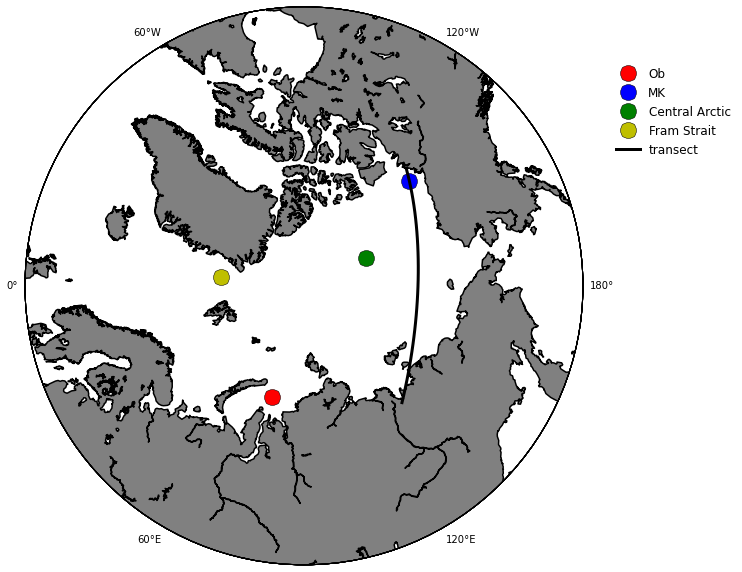

In [14]:
fig=plt.figure(figsize=(10, 10)); ax=plt.gca()
proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax)
proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
proj.drawcoastlines(linewidth=1.5, color='k')
x1, y1 = proj(nav_lon[145, -32], nav_lat[145, -32])
x2, y2 = proj(nav_lon[131, 67], nav_lat[131, 67])
x3, y3 = proj(nav_lon[138, 55], nav_lat[138, 55])
x4, y4 = proj(nav_lon[135, -48], nav_lat[135, -48])
x5, y5 = proj(nav_lon[131, 35:70], nav_lat[131, 35:70])
proj.plot(x1, y1, 'ro', ms=16, label='Ob')
proj.plot(x2, y2, 'bo', ms=16, label='MK')
proj.plot(x3, y3, 'go', ms=16, label='Central Arctic')
proj.plot(x4, y4, 'yo', ms=16, label='Fram Strait')
proj.plot(x5, y5, 'k-', lw=3, ms=16, label='transect')
LG = ax.legend(numpoints=1, bbox_to_anchor=(1.05, 0.9), loc=2, borderaxespad=0.); LG.draw_frame(False)

# Ba

In [15]:
L = 1
lev1 = range(40, 73, 3)
lev2 = [-14, -10, -6, -2, 2, 6, 10, 14]

In [16]:
Ba_Jan = np.ma.masked_where(((domain==0) | (Ba[24, L, :, :]==0)), Ba[24, L, :, :])
Ba_Apr = np.ma.masked_where(((domain==0) | (Ba[27, L, :, :]==0)), Ba[27, L, :, :])
Ba_Jul = np.ma.masked_where(((domain==0) | (Ba[30, L, :, :]==0)), Ba[30, L, :, :])
Ba_Oct = np.ma.masked_where(((domain==0) | (Ba[33, L, :, :]==0)), Ba[30, L, :, :])

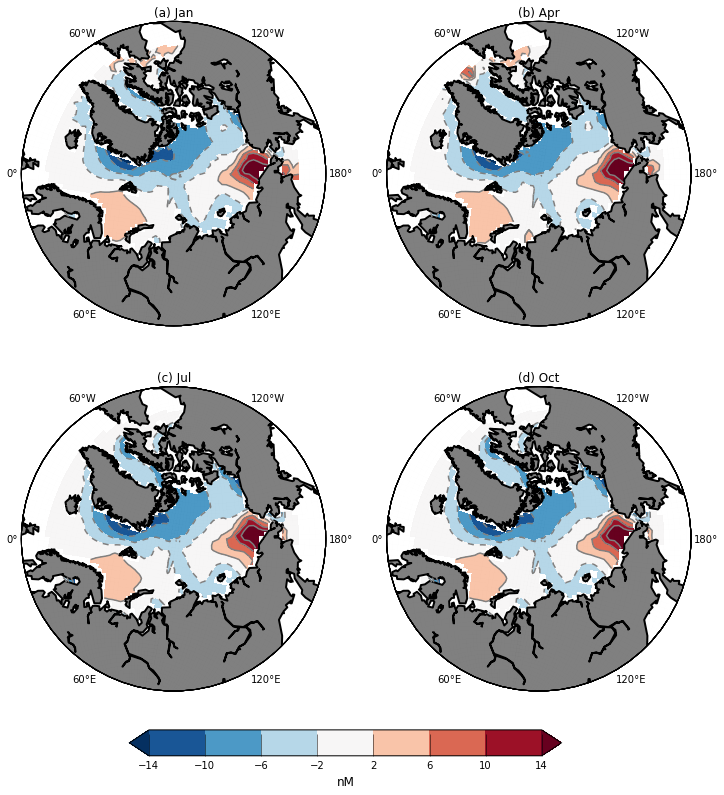

In [17]:
fig = plt.figure(figsize=(12, 12))
ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((2, 2), (0, 1), colspan=1, rowspan=1)
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=1, rowspan=1)
ax4 = plt.subplot2grid((2, 2), (1, 1), colspan=1, rowspan=1)

CS1 = plot_Ba(nav_lon, nav_lat, Ba_Jan-Ba_orca[L, :, :], lev2, plt.cm.RdBu_r, ax1)
CS2 = plot_Ba(nav_lon, nav_lat, Ba_Apr-Ba_orca[L, :, :], lev2, plt.cm.RdBu_r, ax2)
CS3 = plot_Ba(nav_lon, nav_lat, Ba_Jul-Ba_orca[L, :, :], lev2, plt.cm.RdBu_r, ax3)
CS4 = plot_Ba(nav_lon, nav_lat, Ba_Oct-Ba_orca[L, :, :], lev2, plt.cm.RdBu_r, ax4)
# Title
ax1.set_title('(a) Jan'); ax2.set_title('(b) Apr')
ax3.set_title('(c) Jul'); ax4.set_title('(d) Oct')
# cbar
cax2  = fig.add_axes([0.25, 0.05, 0.5, 0.03])
CBar2 = fig.colorbar(CS2, cax=cax2, orientation='horizontal')
CBar2.set_label('nM', fontsize=12)
CBar2.ax.tick_params(axis='x', length=22)
CBar2.set_ticks(lev2)

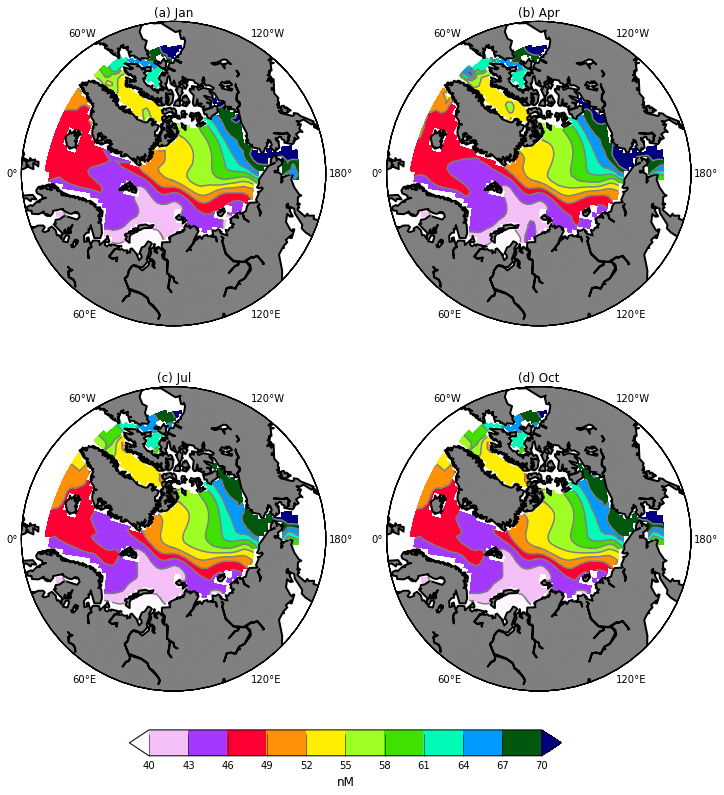

In [18]:
fig = plt.figure(figsize=(12, 12))
ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((2, 2), (0, 1), colspan=1, rowspan=1)
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=1, rowspan=1)
ax4 = plt.subplot2grid((2, 2), (1, 1), colspan=1, rowspan=1)

CS1 = plot_Ba(nav_lon, nav_lat, Ba_Jan, lev1, plt.cm.gist_ncar_r, ax1)
CS2 = plot_Ba(nav_lon, nav_lat, Ba_Apr, lev1, plt.cm.gist_ncar_r, ax2)
CS3 = plot_Ba(nav_lon, nav_lat, Ba_Jul, lev1, plt.cm.gist_ncar_r, ax3)
CS4 = plot_Ba(nav_lon, nav_lat, Ba_Oct, lev1, plt.cm.gist_ncar_r, ax4)
# Title
ax1.set_title('(a) Jan'); ax2.set_title('(b) Apr')
ax3.set_title('(c) Jul'); ax4.set_title('(d) Oct')
# cbar
cax2  = fig.add_axes([0.25, 0.05, 0.5, 0.03])
CBar2 = fig.colorbar(CS2, cax=cax2, orientation='horizontal')
CBar2.set_label('nM', fontsize=12)
CBar2.ax.tick_params(axis='x', length=22)
CBar2.set_ticks(lev1)

Guay, C. K., & Falkner, K. K. (1997). Barium as a tracer of Arctic halocline and river waters. *Deep Sea Res*. Part II: Topical Studies in Oceanography, 44(8), 1543-1569.

<img src="../_figures/Ba2.PNG" width=550 align="left"/>

Roeske, T., Bauch, D., Loeff, M. R. V., & Rabe, B. (2012). Utility of dissolved barium in distinguishing North American from Eurasian runoff in the Arctic Ocean. *Marine Chem*., 132, 1-14.

<img src="../_figures/Ba1.PNG" width=550 align="left"/>

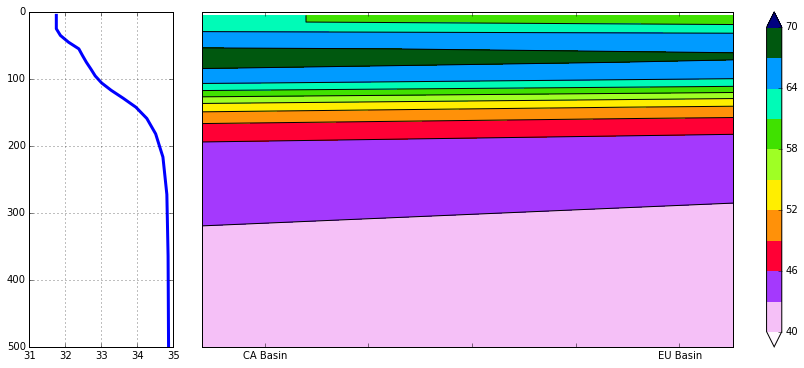

In [19]:
lon = nav_lon[131, 35:70]
x, y = np.meshgrid(lon, deptht)
salin = S[24, :, 131, 52]
# Plot
fig = plt.figure(figsize=(15, 6))
ax1 = plt.subplot2grid((1, 5), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((1, 5), (0, 1), colspan=4, rowspan=1)
# Frame 1
ax1.plot(salin, deptht, 'b-', lw=3)
ax1.set_ylim([0, 500])
ax1.set_xlim([31, 35])
ax1.set_xticks(range(31, 36))
ax1.grid()
ax1.invert_yaxis()
# Frame 2
CS=ax2.contourf(x, y, Ba[24, :, 131, 35:70], lev1, cmap=plt.cm.gist_ncar_r, extend='both')
ax2.contour(x, y, Ba[24, :, 131, 35:70], lev1, colors = ('k',), linewidth=1)
CBar=plt.colorbar(CS)
ax2.set_xticklabels(['', 'CA Basin', '', '', '', 'EU Basin'])
ax2.yaxis.set_visible(False)
ax2.set_xlim([-130, 126])
ax2.set_ylim([0, 500])
ax2.invert_yaxis()

Taylor, J. R., Falkner, K. K., Schauer, U., & Meredith, M. (2003). Quantitative considerations of dissolved barium as a tracer in the Arctic Ocean. *J. Geophys. Res*. (1978–2012), 108(C12).

<img src="../_figures/Ba3.PNG" width=550 align="left"/>

Roeske et al. (2012)

<img src="../_figures/Ba4.PNG" width=550 align="left"/>

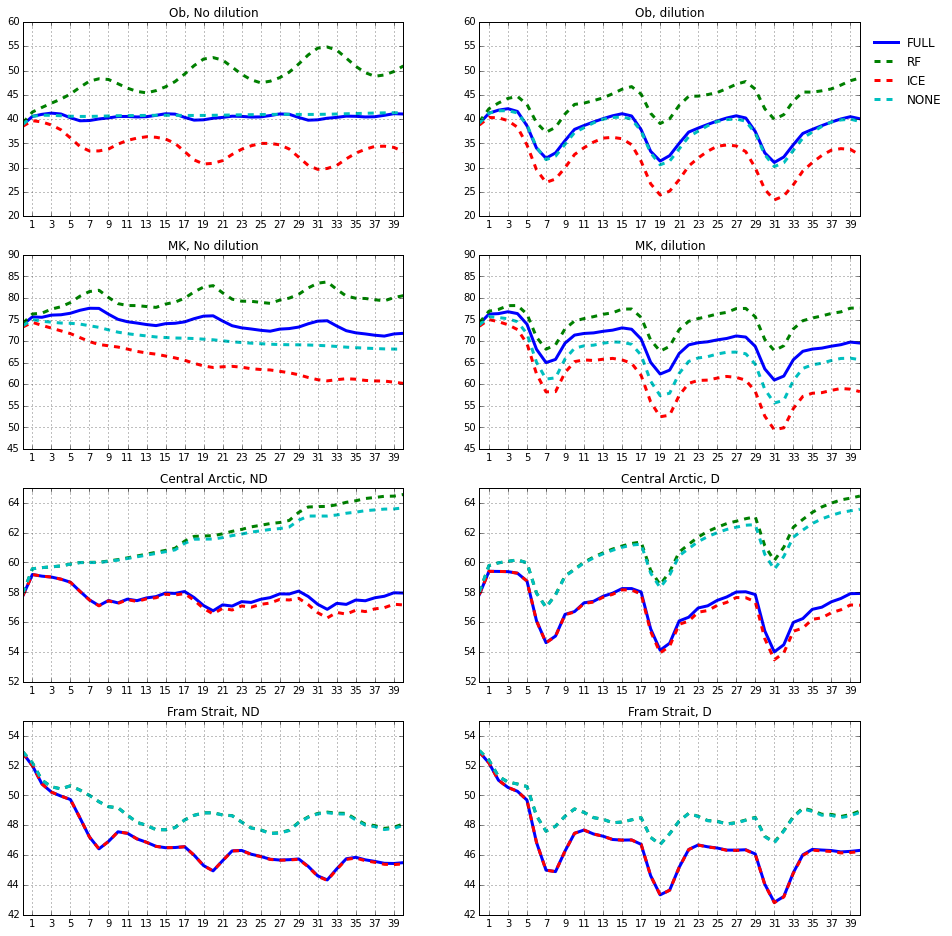

In [40]:
fig = plt.figure(figsize=(15, 16))
ax1 = plt.subplot2grid((4, 2), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((4, 2), (0, 1), colspan=1, rowspan=1)
ax3 = plt.subplot2grid((4, 2), (1, 0), colspan=1, rowspan=1)
ax4 = plt.subplot2grid((4, 2), (1, 1), colspan=1, rowspan=1)
ax5 = plt.subplot2grid((4, 2), (2, 0), colspan=1, rowspan=1)
ax6 = plt.subplot2grid((4, 2), (2, 1), colspan=1, rowspan=1)
ax7 = plt.subplot2grid((4, 2), (3, 0), colspan=1, rowspan=1)
ax8 = plt.subplot2grid((4, 2), (3, 1), colspan=1, rowspan=1)
plot1(OB1, OB2, OB3, OB4, ax1); ax1.set_title('Ob, No dilution')
plot1(OB1d, OB2d, OB3d, OB4d, ax2); ax2.set_title('Ob, dilution')
plot1(MK1, MK2, MK3, MK4, ax3); ax3.set_title('MK, No dilution')
plot1(MK1d, MK2d, MK3d, MK4d, ax4); ax4.set_title('MK, dilution')
plot1(CA1, CA2, CA3, CA4, ax5); ax5.set_title('Central Arctic, ND')
plot1(CA1d, CA2d, CA3d, CA4d, ax6); ax6.set_title('Central Arctic, D')
plot1(FR1, FR2, FR3, FR4, ax7); ax7.set_title('Fram Strait, ND')
plot1(FR1d, FR2d, FR3d, FR4d, ax8); ax8.set_title('Fram Strait, D')
#
ax1.set_ylim([20, 60]); ax2.set_ylim([20, 60]) 
ax3.set_ylim([45, 90]); ax4.set_ylim([45, 90])
ax5.set_ylim([52, 65]); ax6.set_ylim([52, 65])
ax7.set_ylim([42, 55]); ax8.set_ylim([42, 55])
LG = ax2.legend(numpoints=1, bbox_to_anchor=(1.025, 0.95), loc=2, borderaxespad=0.); LG.draw_frame(False)

#$\mathsf{\delta^{18}O}$

In [41]:
L = 0
lev1 = [-3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5]
lev2 = [-1.5, -1, -0.5, 0, 0.5, 1, 1.5]

In [42]:
d18O_Jan = np.ma.masked_where(((domain==0) | (Ba[24, L, :, :]==0)), d18O[24, L, :, :])
d18O_Apr = np.ma.masked_where(((domain==0) | (Ba[27, L, :, :]==0)), d18O[27, L, :, :])
d18O_Jul = np.ma.masked_where(((domain==0) | (Ba[30, L, :, :]==0)), d18O[30, L, :, :])
d18O_Oct = np.ma.masked_where(((domain==0) | (Ba[33, L, :, :]==0)), d18O[30, L, :, :])

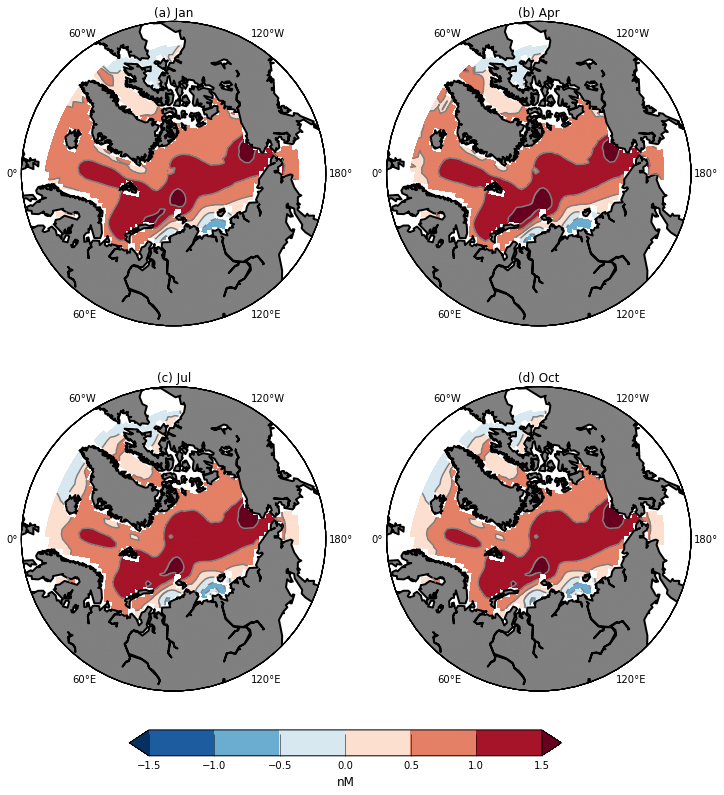

In [43]:
fig = plt.figure(figsize=(12, 12))
ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((2, 2), (0, 1), colspan=1, rowspan=1)
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=1, rowspan=1)
ax4 = plt.subplot2grid((2, 2), (1, 1), colspan=1, rowspan=1)

CS1 = plot_Ba(nav_lon, nav_lat, d18O_Jan-d18O_orca[L, :, :], lev2, plt.cm.RdBu_r, ax1)
CS2 = plot_Ba(nav_lon, nav_lat, d18O_Apr-d18O_orca[L, :, :], lev2, plt.cm.RdBu_r, ax2)
CS3 = plot_Ba(nav_lon, nav_lat, d18O_Jul-d18O_orca[L, :, :], lev2, plt.cm.RdBu_r, ax3)
CS4 = plot_Ba(nav_lon, nav_lat, d18O_Oct-d18O_orca[L, :, :], lev2, plt.cm.RdBu_r, ax4)
# Title
ax1.set_title('(a) Jan'); ax2.set_title('(b) Apr')
ax3.set_title('(c) Jul'); ax4.set_title('(d) Oct')
# cbar
cax2  = fig.add_axes([0.25, 0.05, 0.5, 0.03])
CBar2 = fig.colorbar(CS2, cax=cax2, orientation='horizontal')
CBar2.set_label('nM', fontsize=12)
CBar2.ax.tick_params(axis='x', length=22)
CBar2.set_ticks(lev2)

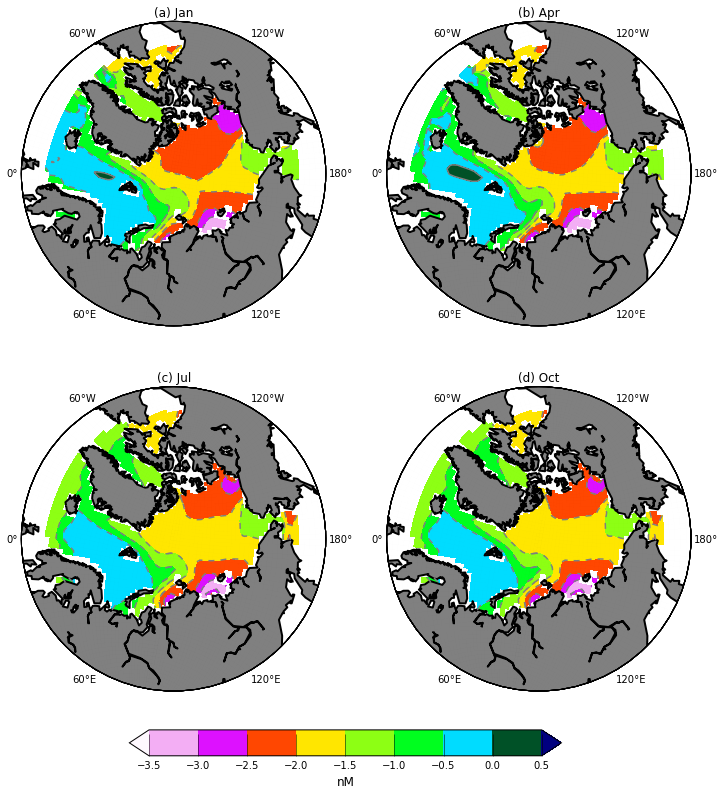

In [72]:
fig = plt.figure(figsize=(12, 12))
ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((2, 2), (0, 1), colspan=1, rowspan=1)
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=1, rowspan=1)
ax4 = plt.subplot2grid((2, 2), (1, 1), colspan=1, rowspan=1)

CS1 = plot_Ba(nav_lon, nav_lat, d18O_Jan, lev1, plt.cm.gist_ncar_r, ax1)
CS2 = plot_Ba(nav_lon, nav_lat, d18O_Apr, lev1, plt.cm.gist_ncar_r, ax2)
CS3 = plot_Ba(nav_lon, nav_lat, d18O_Jul, lev1, plt.cm.gist_ncar_r, ax3)
CS4 = plot_Ba(nav_lon, nav_lat, d18O_Oct, lev1, plt.cm.gist_ncar_r, ax4)
# Title
ax1.set_title('(a) Jan'); ax2.set_title('(b) Apr')
ax3.set_title('(c) Jul'); ax4.set_title('(d) Oct')
# cbar
cax2  = fig.add_axes([0.25, 0.05, 0.5, 0.03])
CBar2 = fig.colorbar(CS2, cax=cax2, orientation='horizontal')
CBar2.set_label('nM', fontsize=12)
CBar2.ax.tick_params(axis='x', length=22)
CBar2.set_ticks(lev1)

In [44]:
OB1 = d18O1[:41, 0, 145, -32]; OB2 = d18O2[:, 0, 145, -32]; OB3 = d18O3[:, 0, 145, -32]; OB4 = d18O4[:, 0, 145, -32]
MK1 = d18O1[:41, 0, 131, 67];  MK2 = d18O2[:, 0, 131, 67];  MK3 = d18O3[:, 0, 131, 67];  MK4 = d18O4[:, 0, 131, 67]
CA1 = d18O1[:41, 0, 138, 55];  CA2 = d18O2[:, 0, 138, 55];  CA3 = d18O3[:, 0, 138, 55];  CA4 = d18O4[:, 0, 138, 55]
FR1 = d18O1[:41, 0, 135, -48]; FR2 = d18O2[:, 0, 135, -48]; FR3 = d18O3[:, 0, 135, -48]; FR4 = d18O4[:, 0, 135, -48]

In [45]:
OB1d = d18O1d[:41, 0, 145, -32]; OB2d = d18O2d[:, 0, 145, -32]; OB3d = d18O3d[:, 0, 145, -32]; OB4d = d18O4d[:, 0, 145, -32]
MK1d = d18O1d[:41, 0, 131, 67];  MK2d = d18O2d[:, 0, 131, 67];  MK3d = d18O3d[:, 0, 131, 67];  MK4d = d18O4d[:, 0, 131, 67]
CA1d = d18O1d[:41, 0, 138, 55];  CA2d = d18O2d[:, 0, 138, 55];  CA3d = d18O3d[:, 0, 138, 55];  CA4d = d18O4d[:, 0, 138, 55]
FR1d = d18O1d[:41, 0, 135, -48]; FR2d = d18O2d[:, 0, 135, -48]; FR3d = d18O3d[:, 0, 135, -48]; FR4d = d18O4d[:, 0, 135, -48]

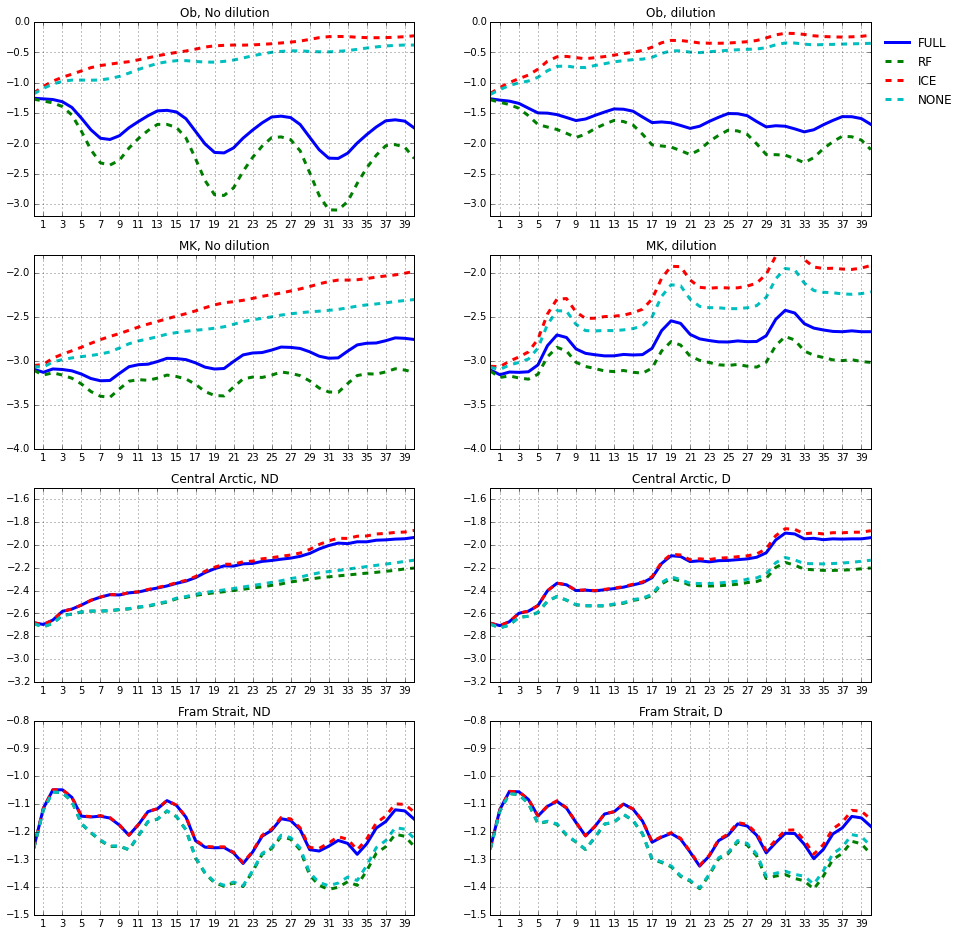

In [47]:
fig = plt.figure(figsize=(15, 16))
ax1 = plt.subplot2grid((4, 2), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((4, 2), (0, 1), colspan=1, rowspan=1)
ax3 = plt.subplot2grid((4, 2), (1, 0), colspan=1, rowspan=1)
ax4 = plt.subplot2grid((4, 2), (1, 1), colspan=1, rowspan=1)
ax5 = plt.subplot2grid((4, 2), (2, 0), colspan=1, rowspan=1)
ax6 = plt.subplot2grid((4, 2), (2, 1), colspan=1, rowspan=1)
ax7 = plt.subplot2grid((4, 2), (3, 0), colspan=1, rowspan=1)
ax8 = plt.subplot2grid((4, 2), (3, 1), colspan=1, rowspan=1)
plot1(OB1, OB2, OB3, OB4, ax1); ax1.set_title('Ob, No dilution')
plot1(OB1d, OB2d, OB3d, OB4d, ax2); ax2.set_title('Ob, dilution')
plot1(MK1, MK2, MK3, MK4, ax3); ax3.set_title('MK, No dilution')
plot1(MK1d, MK2d, MK3d, MK4d, ax4); ax4.set_title('MK, dilution')
plot1(CA1, CA2, CA3, CA4, ax5); ax5.set_title('Central Arctic, ND')
plot1(CA1d, CA2d, CA3d, CA4d, ax6); ax6.set_title('Central Arctic, D')
plot1(FR1, FR2, FR3, FR4, ax7); ax7.set_title('Fram Strait, ND')
plot1(FR1d, FR2d, FR3d, FR4d, ax8); ax8.set_title('Fram Strait, D')
#
ax1.set_ylim([-3.2, 0]); ax2.set_ylim([-3.2, 0])
ax3.set_ylim([-4, -1.8]); ax4.set_ylim([-4, -1.8])
ax5.set_ylim([-3.2, -1.5]); ax6.set_ylim([-3.2, -1.5])
ax7.set_ylim([-1.5, -0.8]); ax8.set_ylim([-1.5, -0.8])
LG = ax2.legend(numpoints=1, bbox_to_anchor=(1.025, 0.95), loc=2, borderaxespad=0.); LG.draw_frame(False)

# Forcing files

In [51]:
name=glob.glob('_data/NEMO/INPUT_DYNA/*')
NC = nc.Dataset(name[0]) 
IO= NC.variables['iowaflup']; AO = NC.variables['sowaflep']; S = NC.variables['vosaline']
T = NC.variables['votemper']; RF = NC.variables['sorunoff']; DIL = NC.variables['sowaflcd']
IO1=IO[:, 145, -32]; IO2=IO[:, 131, 67]; IO3=IO[:, 138, 55]; IO4=IO[:, 135, -48]
AO1=AO[:, 145, -32]; AO2=AO[:, 131, 67]; AO3=AO[:, 138, 55]; AO4=AO[:, 135, -48]
RF1=RF[:, 145, -32]; RF2=RF[:, 131, 67]; RF3=RF[:, 138, 55]; RF4=RF[:, 135, -48]
DIL1=DIL[:, 145, -32]; DIL2=DIL[:, 131, 67]; DIL3=DIL[:, 138, 55]; DIL4=DIL[:, 135, -48]
T1=T[:, 0, 145, -32]; T2=T[:, 0, 131, 67]; T3=T[:, 0, 138, 55]; T4=T[:, 0, 135, -48]
S1=S[:, 0, 145, -32]; S2=S[:, 0, 131, 67]; S3=S[:, 0, 138, 55]; S4=S[:, 0, 135, -48]

In [58]:
t = np.linspace(0, 12, 73);

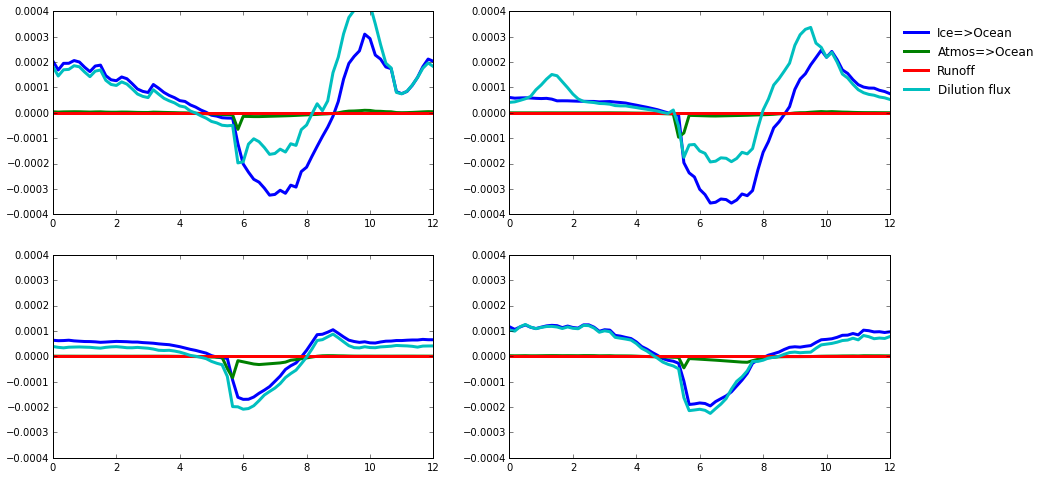

In [60]:
fig = plt.figure(figsize=(15, 8))
ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((2, 2), (0, 1), colspan=1, rowspan=1)
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=1, rowspan=1)
ax4 = plt.subplot2grid((2, 2), (1, 1), colspan=1, rowspan=1)
plot3(t, IO1, AO1, RF1, DIL1, ax1)
plot3(t, IO2, AO2, RF2, DIL2, ax2)
plot3(t, IO3, AO3, RF3, DIL3, ax3)
plot3(t, IO4, AO4, RF4, DIL4, ax4)
ax1.set_ylim([-4e-4, 4e-4]); ax2.set_ylim([-4e-4, 4e-4])
ax3.set_ylim([-4e-4, 4e-4]); ax4.set_ylim([-4e-4, 4e-4])
ax1.set_xlim([0, 12]); ax2.set_xlim([0, 12])
ax3.set_xlim([0, 12]); ax4.set_xlim([0, 12])
LG = ax2.legend(numpoints=1, bbox_to_anchor=(1.025, 0.95), loc=2, borderaxespad=0.); LG.draw_frame(False)

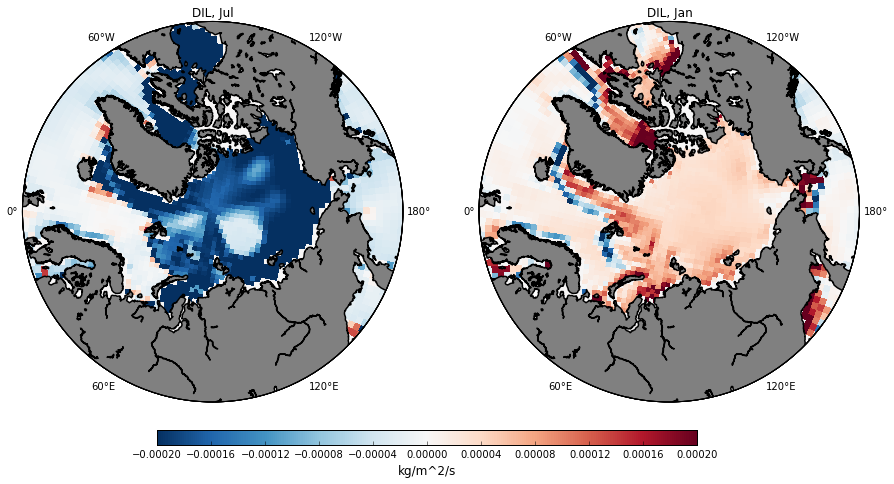

In [70]:
fig=plt.figure(figsize=(15, 7)); ax=plt.gca()

ax1 = plt.subplot2grid((1, 2), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((1, 2), (0, 1), colspan=1, rowspan=1)

proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax1)
proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
proj.drawcoastlines(linewidth=1.5, color='k')
x, y = proj(nav_lon, nav_lat)
proj.pcolor(x, y, DIL[38, :, :], cmap=plt.cm.RdBu_r, vmin=-2e-4, vmax=2e-4)
ax1.set_title('DIL, Jul')

proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax2)
proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
proj.drawcoastlines(linewidth=1.5, color='k')
x, y = proj(nav_lon, nav_lat)
CS = proj.pcolor(x, y, DIL[0, :, :], cmap=plt.cm.RdBu_r, vmin=-2e-4, vmax=2e-4)
ax2.set_title('DIL, Jan')

cax2  = fig.add_axes([0.25, 0.05, 0.5, 0.03])
CBar2 = fig.colorbar(CS, cax=cax2, orientation='horizontal')
CBar2.set_label('kg/m^2/s', fontsize=12)

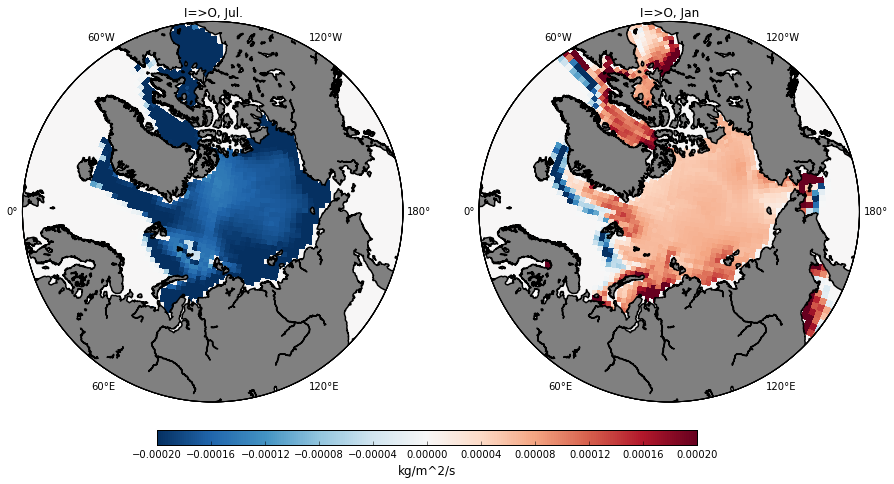

In [71]:
fig=plt.figure(figsize=(15, 7)); ax=plt.gca()

ax1 = plt.subplot2grid((1, 2), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((1, 2), (0, 1), colspan=1, rowspan=1)

proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax1)
proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
proj.drawcoastlines(linewidth=1.5, color='k')
x, y = proj(nav_lon, nav_lat)
proj.pcolor(x, y, IO[38, :, :], cmap=plt.cm.RdBu_r, vmin=-2e-4, vmax=2e-4)
ax1.set_title('I=>O, Jul.')

proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax2)
proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
proj.drawcoastlines(linewidth=1.5, color='k')
x, y = proj(nav_lon, nav_lat)
CS = proj.pcolor(x, y, IO[0, :, :], cmap=plt.cm.RdBu_r, vmin=-2e-4, vmax=2e-4)
ax2.set_title('I=>O, Jan')

cax2  = fig.add_axes([0.25, 0.05, 0.5, 0.03])
CBar2 = fig.colorbar(CS, cax=cax2, orientation='horizontal')
CBar2.set_label('kg/m^2/s', fontsize=12)

In [61]:
DIL.shape

(73, 149, 182)